In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [127]:
# initial data
data_init = lambda name: pd.read_csv(f'data/{name}_data.csv')

df_train = data_init('train')
df_test = data_init('test')

In [128]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [130]:
# 5 columns with NaN: [
#   'Annual Income',
#   'Years in current job',
#   'Months since last delinquent',
#   'Bankruptcies',
#   'Credit Score'
# ]
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [131]:
def change_on_median(feature):
    df_train.loc[df_train[feature].isna(), feature] = df_train[feature].median()

def change_on_frequent(feature):
    df_train.loc[df_train[feature].isna(), feature] = df_train[feature].value_counts().index[0]

#### 1. Column: Annual Income  (numeric)

In [132]:
df_train['Annual Income'].head(6)

0     482087.0
1    1025487.0
2     751412.0
3     805068.0
4     776264.0
5          NaN
Name: Annual Income, dtype: float64

In [133]:
# 'Annual Income' == NaN => median
change_on_median('Annual Income')
df_train['Annual Income'].isna().sum()
#df_train.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_train['Annual Income'].median()

0

#### 2. Column: Years in current job  (categorical)

In [134]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [135]:
# 'Years in current job' == NaN => most frequent  ()
change_on_frequent('Years in current job')
df_train['Years in current job'].value_counts()

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [136]:
#### 3. Column: Months since last delinquent (numeric)
df_train['Months since last delinquent'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Months since last delinquent, dtype: float64

In [137]:
change_on_median('Months since last delinquent')
df_train['Months since last delinquent'].isna().sum()

0

#### 4. Column: Bankruptcies  (categorical)

In [138]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [139]:
# 'Bankruptcies' == NaN => most frequent  ()
change_on_frequent('Bankruptcies')
df_train['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

#### 5. Column: Credit Score  (numeric)

In [140]:
df_train['Credit Score'].head(6)

0    749.0
1    737.0
2    742.0
3    694.0
4    719.0
5      NaN
Name: Credit Score, dtype: float64

In [141]:
# 'Credit Score' == NaN => median
change_on_median('Credit Score')
df_train['Credit Score'].isna().sum()

0

### Balancing classes

In [142]:
target_name = 'Credit Default'

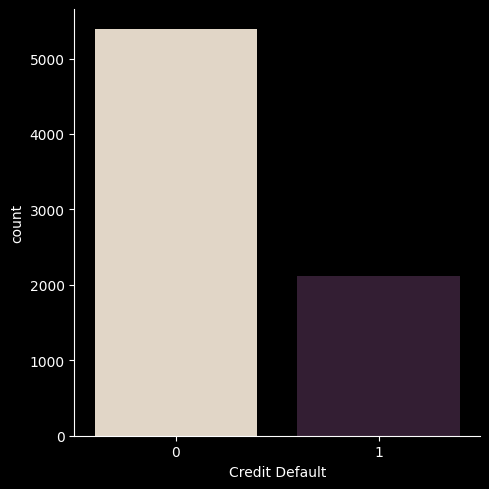

In [143]:
sns.catplot(data=df_train, x=target_name, kind='count', palette='ch:.25')
plt.show()

We observe an imbalance of classes. Let's create a balancing function.

In [144]:
def balancing_target(data, target_name):
    target_counts = data[target_name].value_counts()

    big_cls = target_counts.argmax()
    min_cls = target_counts.argmin()

    # imbalance coef
    ratio = (target_counts[big_cls] / target_counts[min_cls])

    # integer value => ratio of big_class / small_class
    iters = int(ratio)

    for i in range(iters):
        # balancing classes
        sample = data[data[target_name] == min_cls].sample(int(target_counts[min_cls] * ((ratio % 1) if (i == iters - 1) else 1)))
        data = pd.concat([data, sample], axis=0, ignore_index=True)

    return data.sample(frac=1)

In [145]:
df_train = balancing_target(df_train, target_name)
df_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
9749,Rent,1451942.0,2 years,0.0,15.0,9.4,513480.0,0.0,32.0,0.0,debt consolidation,Short Term,188298.0,284696.0,27708.0,653.0,1
90,Rent,1304141.0,10+ years,0.0,6.0,12.9,132418.0,1.0,32.0,1.0,other,Short Term,176616.0,97546.0,14237.0,673.0,0
5820,Rent,1950901.0,3 years,0.0,15.0,26.8,925496.0,0.0,32.0,0.0,debt consolidation,Short Term,345356.0,570703.0,38368.0,728.0,0
3371,Home Mortgage,1356790.0,10+ years,0.0,18.0,14.4,1095820.0,0.0,32.0,0.0,debt consolidation,Long Term,436392.0,417354.0,23405.0,6320.0,1
1200,Home Mortgage,910727.0,10+ years,0.0,15.0,20.6,688006.0,0.0,69.0,0.0,debt consolidation,Long Term,397100.0,388588.0,13964.0,672.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,Rent,829160.0,5 years,0.0,9.0,14.8,310156.0,0.0,32.0,0.0,other,Short Term,52008.0,108490.0,8222.0,663.0,1
1624,Home Mortgage,2633666.0,< 1 year,0.0,16.0,25.5,2075128.0,0.0,32.0,0.0,debt consolidation,Long Term,544566.0,362007.0,14200.0,726.0,0
1312,Rent,372362.0,< 1 year,0.0,7.0,5.1,161898.0,0.0,32.0,0.0,major purchase,Short Term,45276.0,21109.0,5120.0,744.0,0
4631,Rent,1005100.0,10+ years,0.0,7.0,19.4,1086646.0,0.0,32.0,0.0,debt consolidation,Short Term,463276.0,228988.0,3116.0,747.0,0


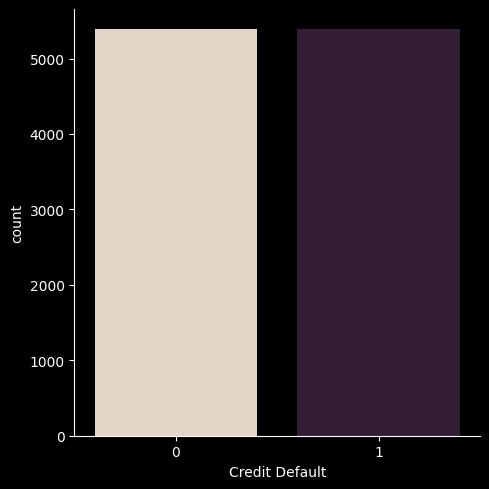

In [146]:
sns.catplot(data=df_train, x=target_name, kind='count', palette='ch:.25')
plt.show()